# Space Server

In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file
df= pd.read_csv("space.csv")

In [3]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
# Checking the shape of the dataset
df.shape

(10000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
# As we can see from the above info there are no null values in the dataset

In [7]:
# checking the correlation
df.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


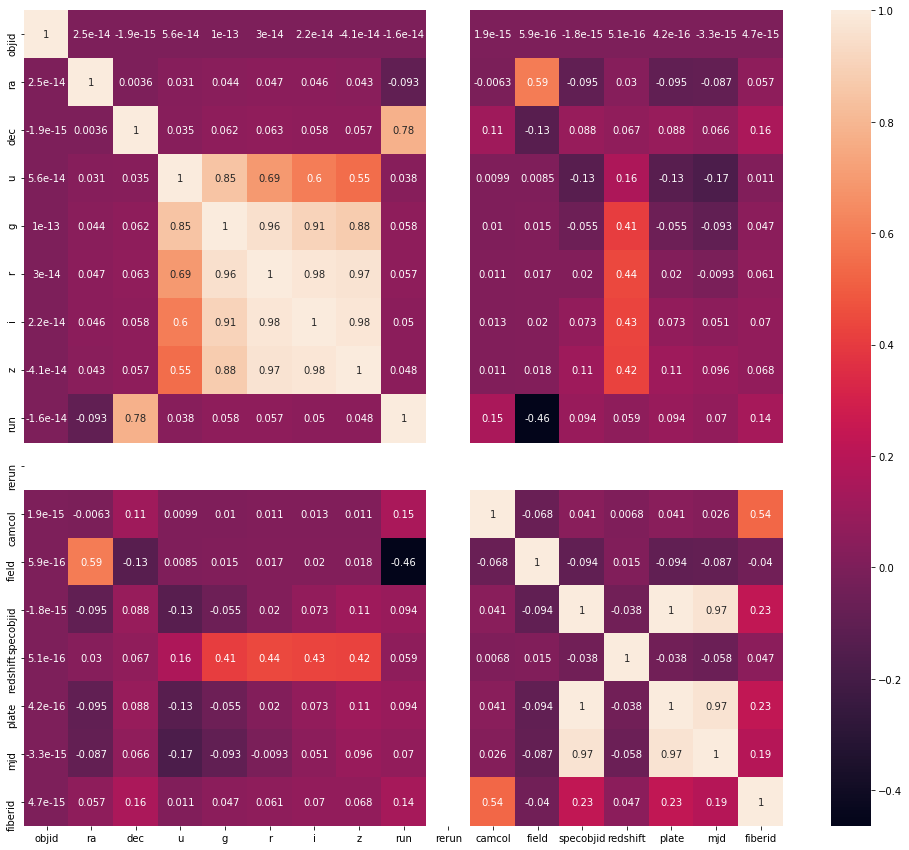

In [8]:
# Plotting the heatmap for the correlation 
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True)

In [9]:
df.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

In [10]:
# Dropping the object idetifiers and features describing the pixels of the image 
df.drop(['objid', 'specobjid', 'run', 'rerun', 'camcol', 'plate', 'mjd', 'fiberid', 'field'], axis=1, inplace=True)

In [11]:
df.head()

,ra,dec,u,g,r,i,z,class,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590


In [12]:
df.dtypes

ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
class        object
redshift    float64
dtype: object

In [13]:
num_var = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']

In [14]:
cat_var = ['class']

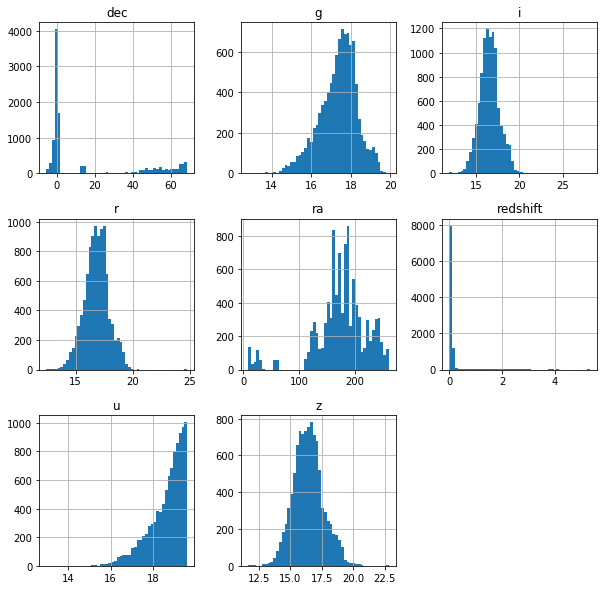

In [15]:
df.hist(bins=50, figsize = (10,10))
plt.show()

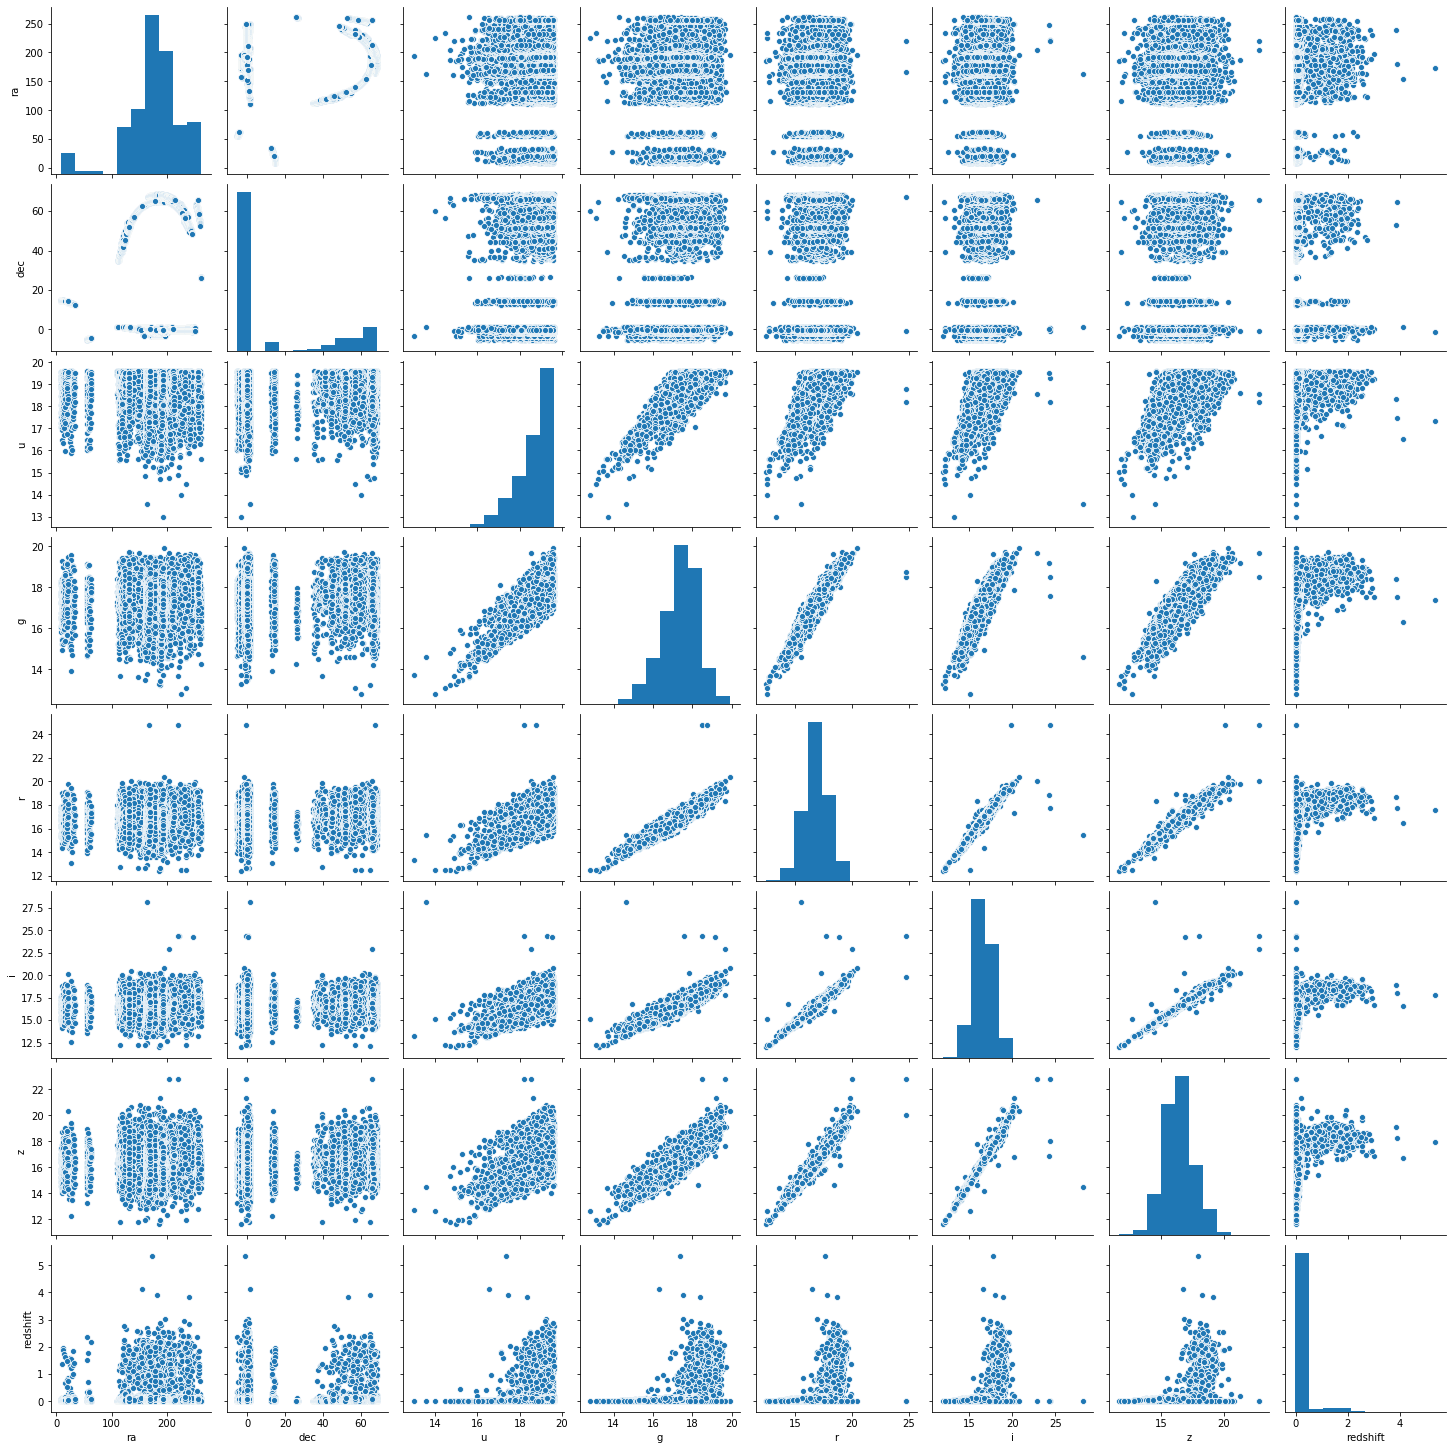

In [16]:
sns.pairplot(df)

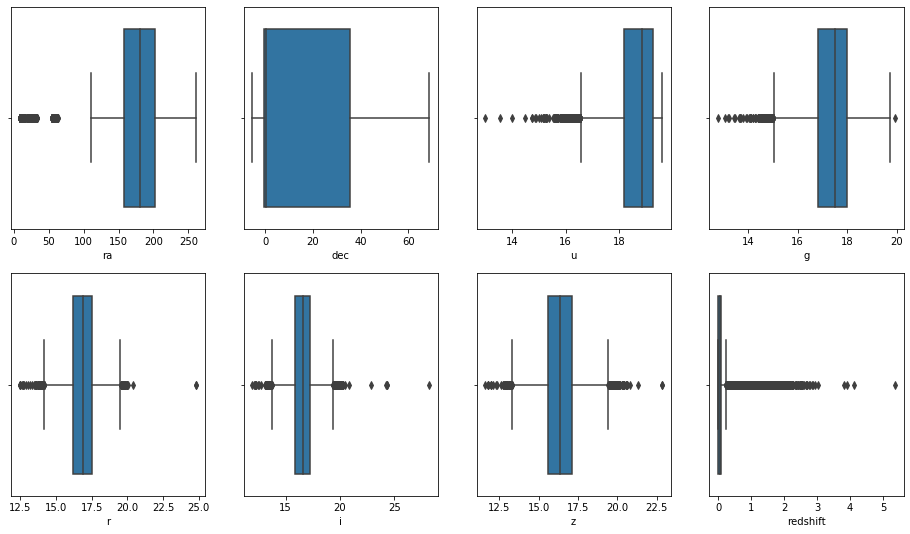

In [17]:
plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
  plt.subplot(2,4,i+1)
  sns.boxplot(df[var])

In [18]:
df_clean = df.copy()

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ra          44.176333
dec         36.188432
u            1.081197
g            1.195045
r            1.339343
i            1.404845
z            1.523162
redshift     0.092498
dtype: float64


In [20]:
df_clean = df_clean[~((df_clean < (Q1 - 1.5 * IQR)) |(df_clean > (Q3 + 1.5 * IQR))).any(axis=1)]

In [21]:
# df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [22]:
len(df)

10000

In [23]:
len(df_clean)

8385

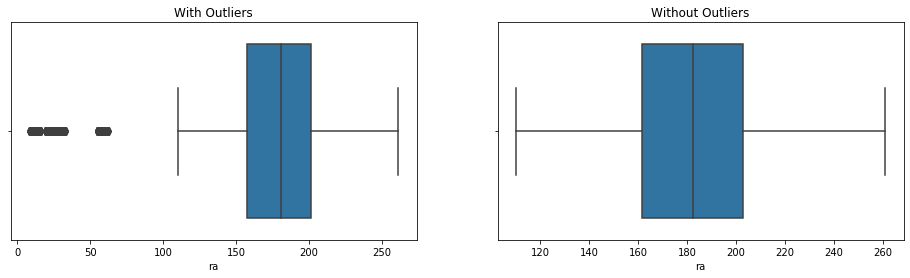

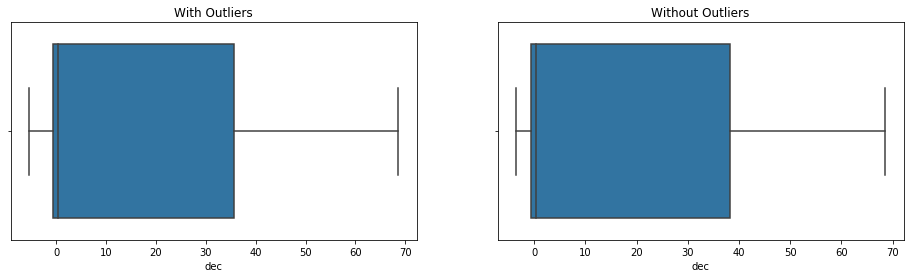

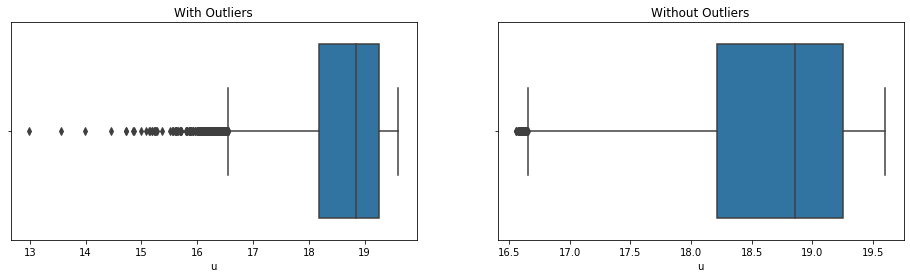

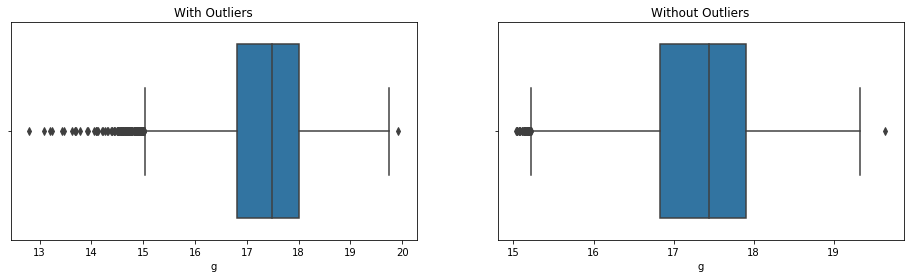

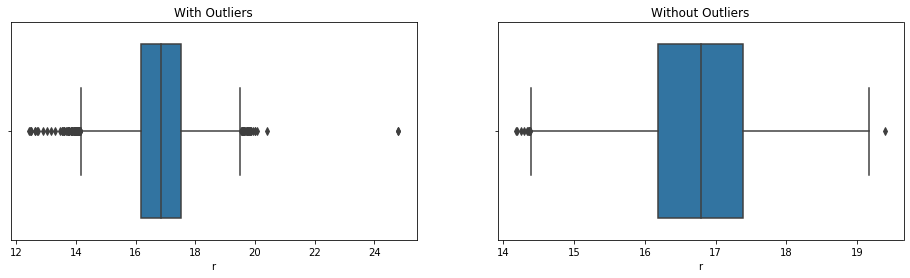

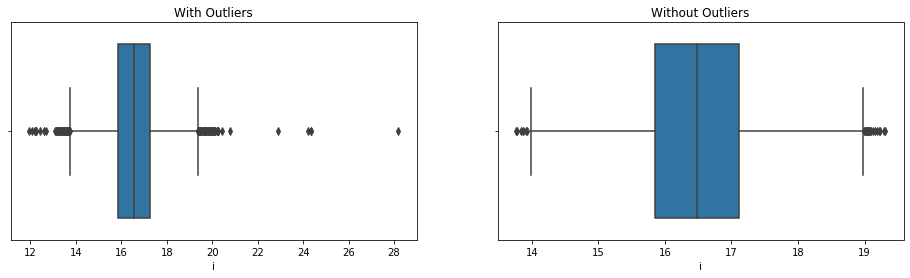

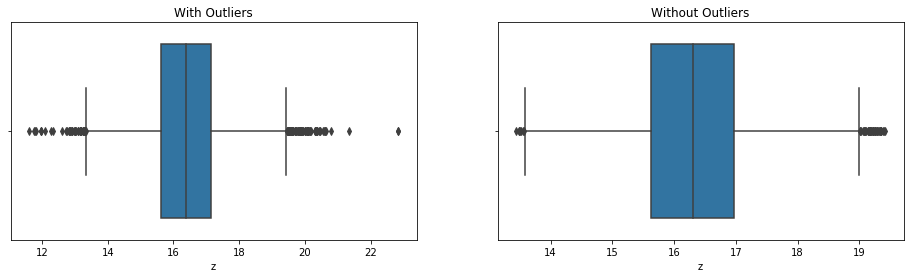

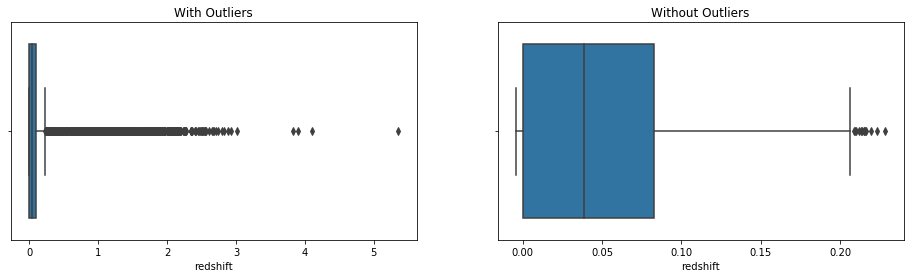

In [24]:
for col in num_var:
    fig = plt.figure (figsize=(16,4))
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.title('With Outliers')
    fig.add_subplot(122)
    sns.boxplot(df_clean[col])
    plt.title('Without Outliers')

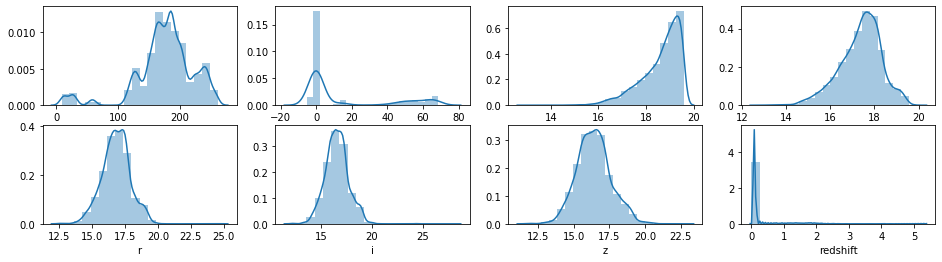

In [25]:
# checking the disribution of each feature
plt.figure(figsize=(16,4))       
for i,var in enumerate(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']):
    plt.subplot(2,4,i+1)
    sns.distplot(df[var], bins=20)

In [26]:
# Checking the skewness 
df_clean.skew()

ra          0.211583
dec         1.198244
u          -0.837939
g          -0.568722
r          -0.270037
i          -0.102505
z           0.019648
redshift    0.670788
dtype: float64

In [27]:
# Checking log transformation
np.log(df_clean[num_var]+1).skew()

ra         -0.218995
dec         0.265204
u          -0.903614
g          -0.662281
r          -0.390798
i          -0.243757
z          -0.139369
redshift    0.603805
dtype: float64

In [28]:
df_clean_log = df_clean.copy()

In [29]:
df_clean_log[num_var] = np.log(df_clean_log[num_var]+1)

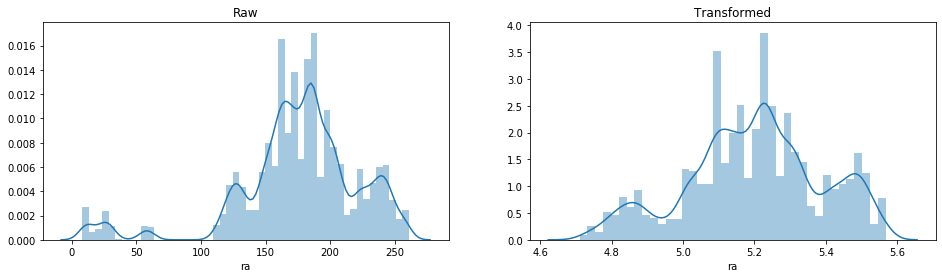

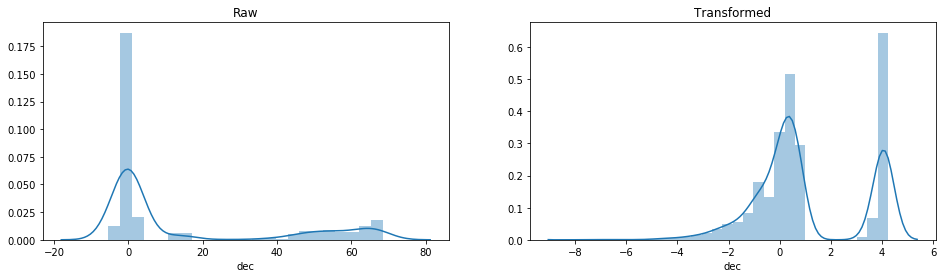

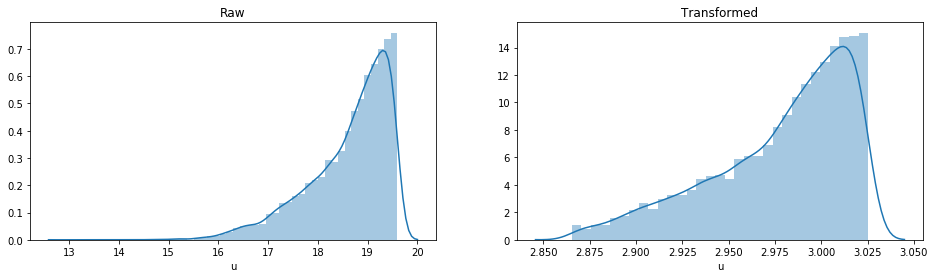

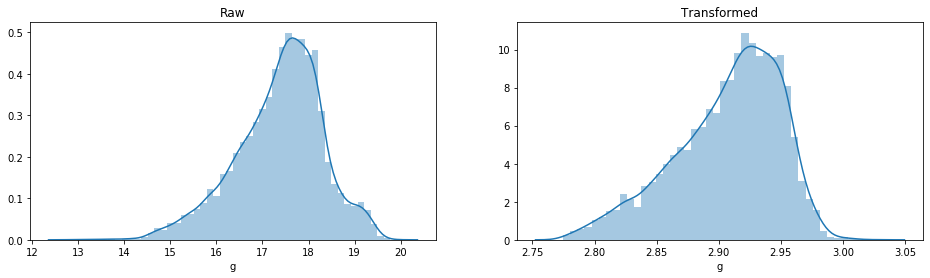

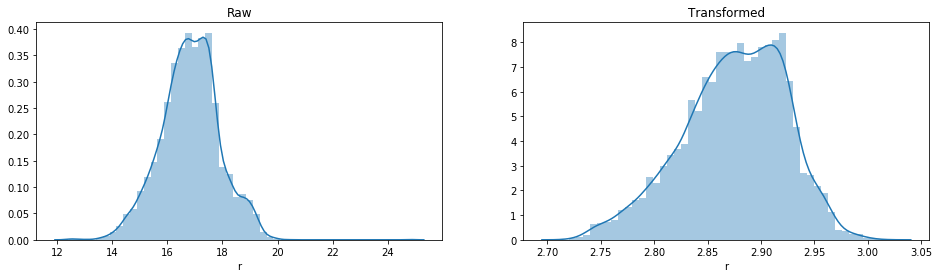

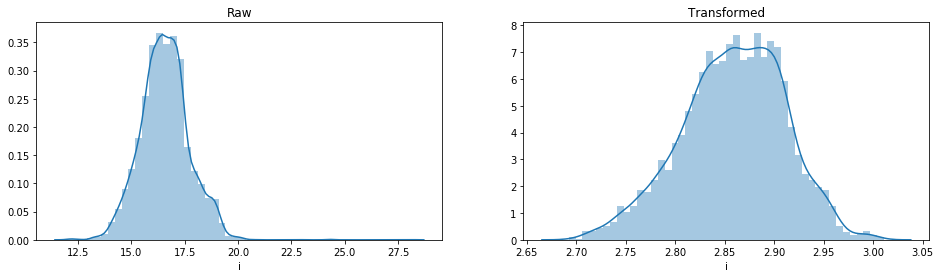

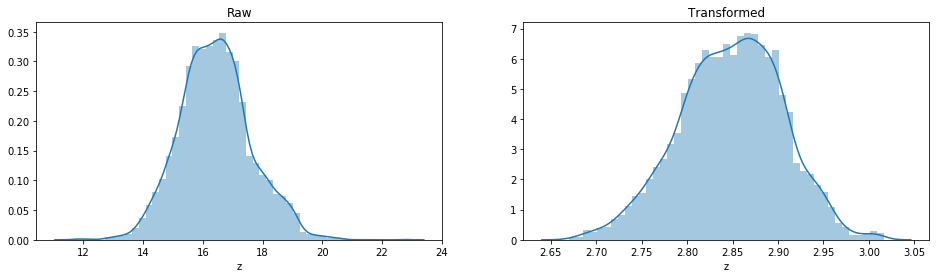

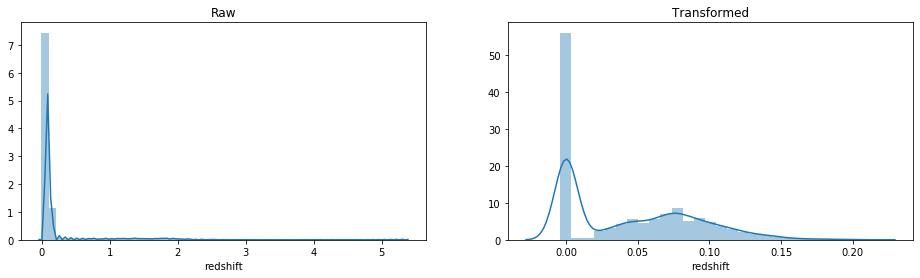

In [30]:
# before and after : skew transformation
for col in num_var:
    fig = plt.figure(figsize=(16,4))
    
    fig.add_subplot(121)
    sns.distplot(df[col])
    plt.title('Raw')
    fig.add_subplot(122)
    sns.distplot(df_clean_log[col])
    plt.title('Transformed')

In [31]:
# Checking Square root transformation
np.sqrt(df_clean[num_var]).skew()

ra         -0.000341
dec         0.332983
u          -0.872348
g          -0.618066
r          -0.333901
i          -0.177416
z          -0.064837
redshift   -0.359364
dtype: float64

In [32]:
df_clean_sq = df_clean.copy()

In [33]:
df_clean_sq[num_var] = np.sqrt(df_clean_sq[num_var])

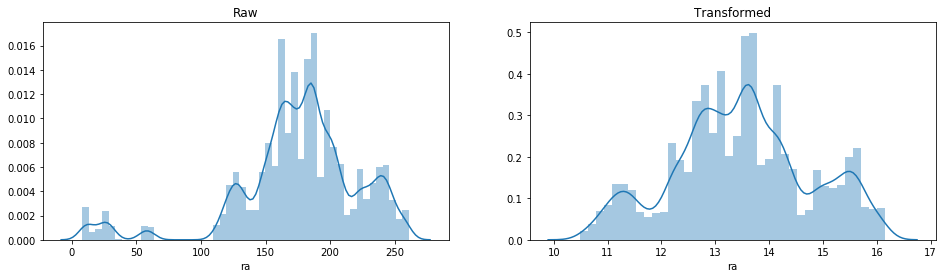

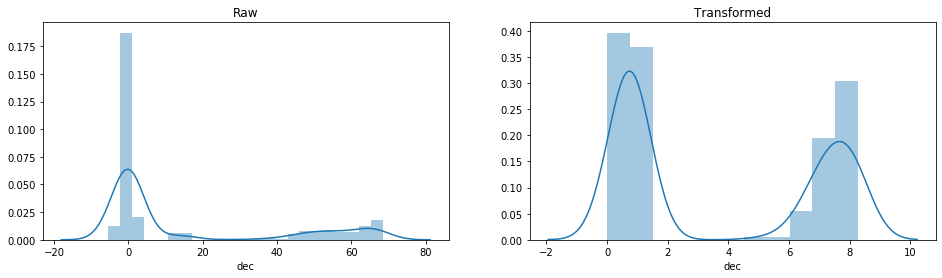

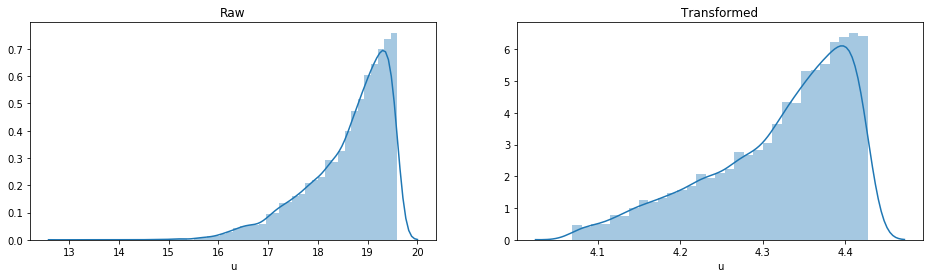

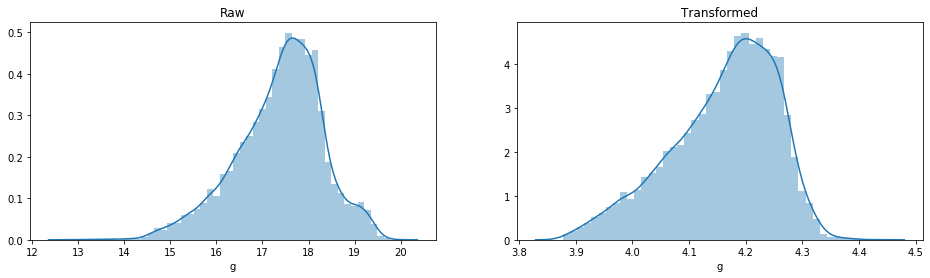

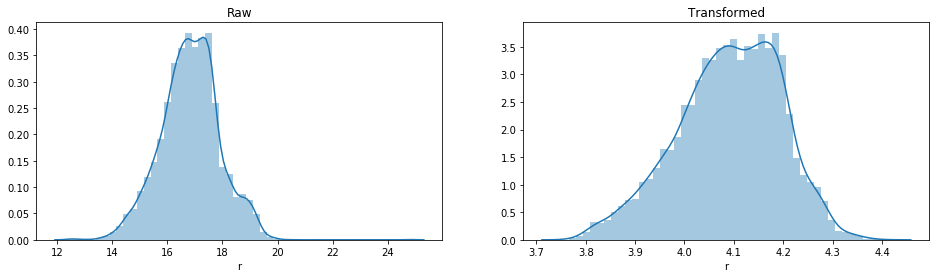

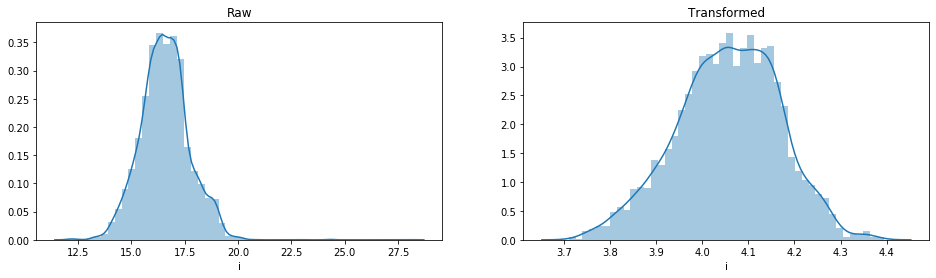

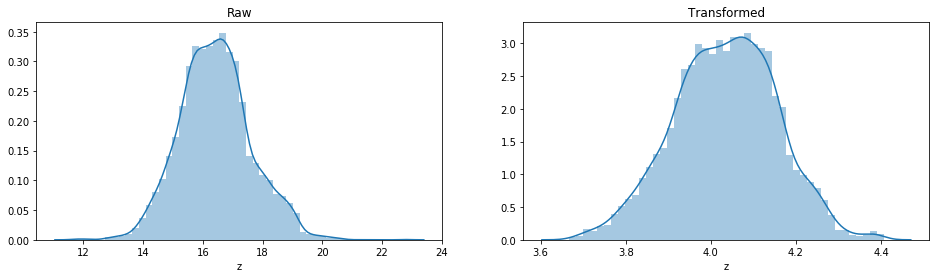

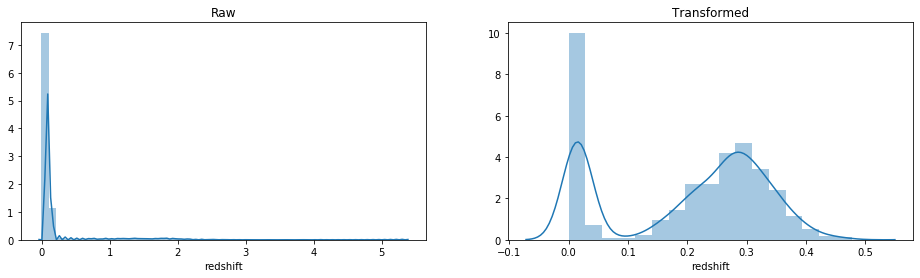

In [34]:
# before and after : skew transformation
for col in num_var:
    fig = plt.figure(figsize=(16,4))
    
    fig.add_subplot(121)
    sns.distplot(df[col])
    plt.title('Raw')
    fig.add_subplot(122)
    sns.distplot(df_clean_sq[col])
    plt.title('Transformed')

In [35]:
# Checkinf Cude Root transformation
np.cbrt(df_clean[num_var]).skew()

ra         -0.073148
dec         0.593586
u          -0.883933
g          -0.634609
r          -0.355276
i          -0.202408
z          -0.092962
redshift   -0.206164
dtype: float64

In [36]:
df_clean_cube = df_clean.copy()

In [37]:
df_clean_cube[num_var] = np.cbrt(df_clean_cube[num_var])

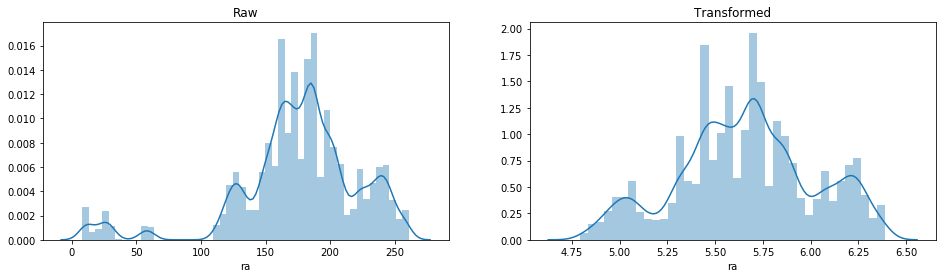

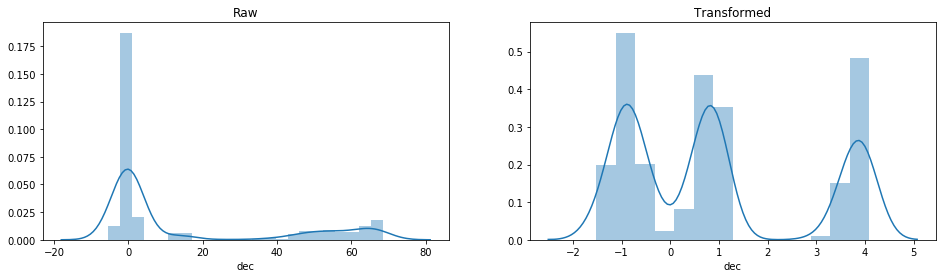

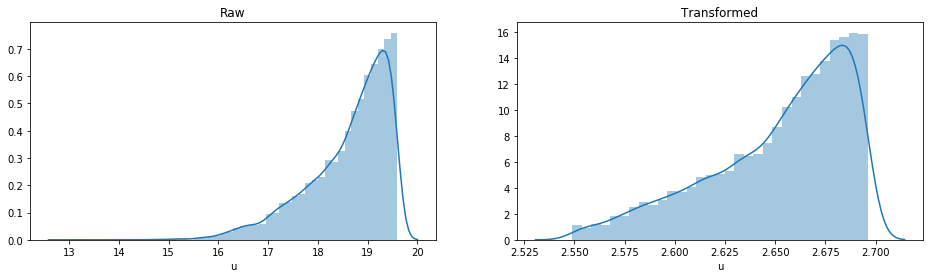

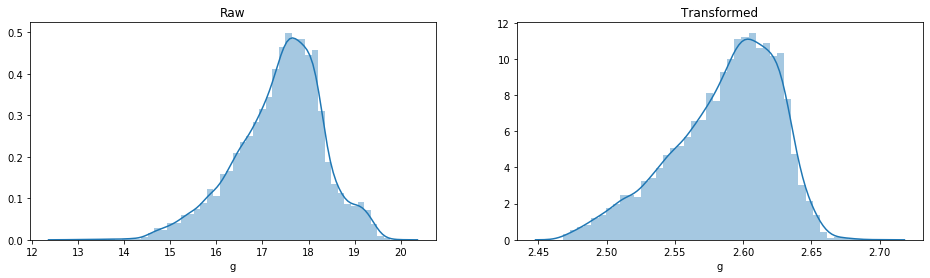

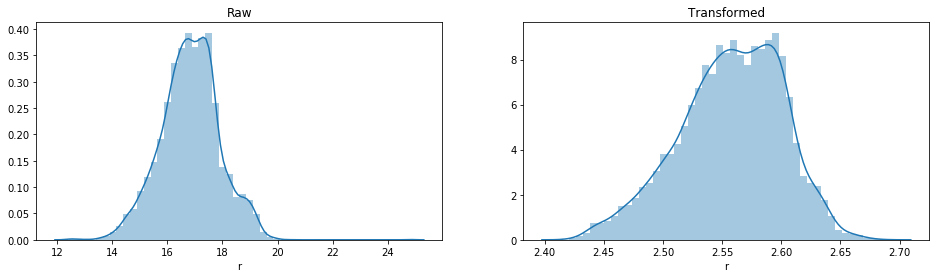

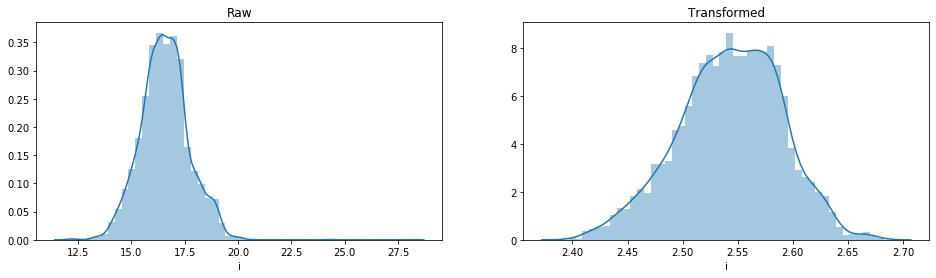

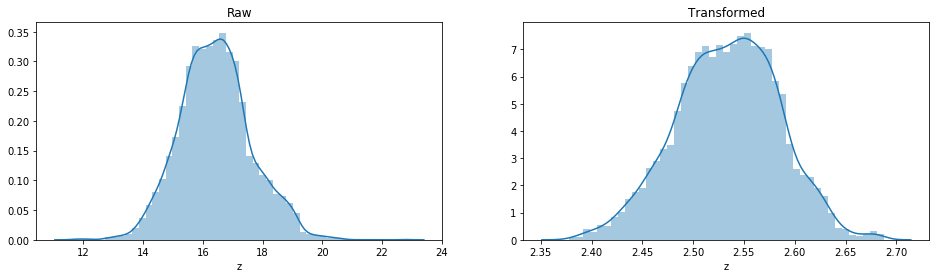

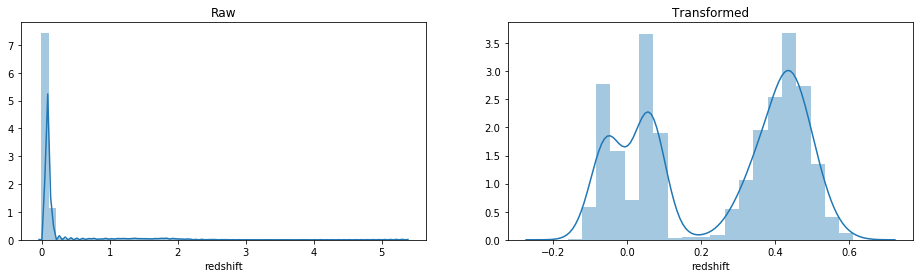

In [38]:
# before and after : skew transformation

for col in num_var:
    fig = plt.figure(figsize=(16,4))
    
    fig.add_subplot(121)
    sns.distplot(df[col])
    plt.title('Raw')
    fig.add_subplot(122)
    sns.distplot(df_clean_cube[col])
    plt.title('Transformed')

In [39]:
# finallizing the skew transformation
df_clean[num_var] = np.cbrt(df_clean[num_var])

In [40]:
x = df_clean.drop('class',1)
y = df_clean['class']

In [41]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=0)
print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (6708, 8)
Shape of y_train =  (6708,)
Shape of x_test =  (1677, 8)
Shape of y_test =  (1677,)


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [45]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [46]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [48]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.9886702444841979


Cross_Val_Score =  0.987485742800114
classification_report
               precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99       911
         QSO       0.00      0.00      0.00        11
        STAR       0.99      1.00      0.99       755

    accuracy                           0.99      1677
   macro avg       0.66      0.66      0.66      1677
weighted avg       0.98      0.99      0.99      1677



[[903   1   7]
 [ 10   0   1]
 [  0   0 755]]
*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_i

In [49]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs})
print(result.sort_values(by = 'Accuracy_score',ascending=True))

                        Model  Accuracy_score  Cross_val_score
4                  GaussianNB       98.211091        98.867978
0        KNeighborsClassifier       98.867024        98.748574
1                         SVC       98.867024        98.808098
2          LogisticRegression       98.867024        98.867622
6  GradientBoostingClassifier       98.867024        98.867978
8          AdaBoostClassifier       99.045915        51.033647
5      RandomForestClassifier       99.105546        99.046550
7        ExtraTreesClassifier       99.105546        98.807742
3      DecisionTreeClassifier       99.344067        98.331195


### As we can see from above trials the best performance is given by DecisionTreeClassifier so it is the final model selected

In [51]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(DT,'space_server.pkl')

['space_server.pkl']